In [1]:
import matplotlib.pyplot as plt
from librosa.feature import *
import numpy as np
from os import path
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
X_0 = np.load(path.join("gen_data", "ECG_normal.npy"))
X_1 = np.load(path.join("gen_data", "ECG_apnea.npy"))

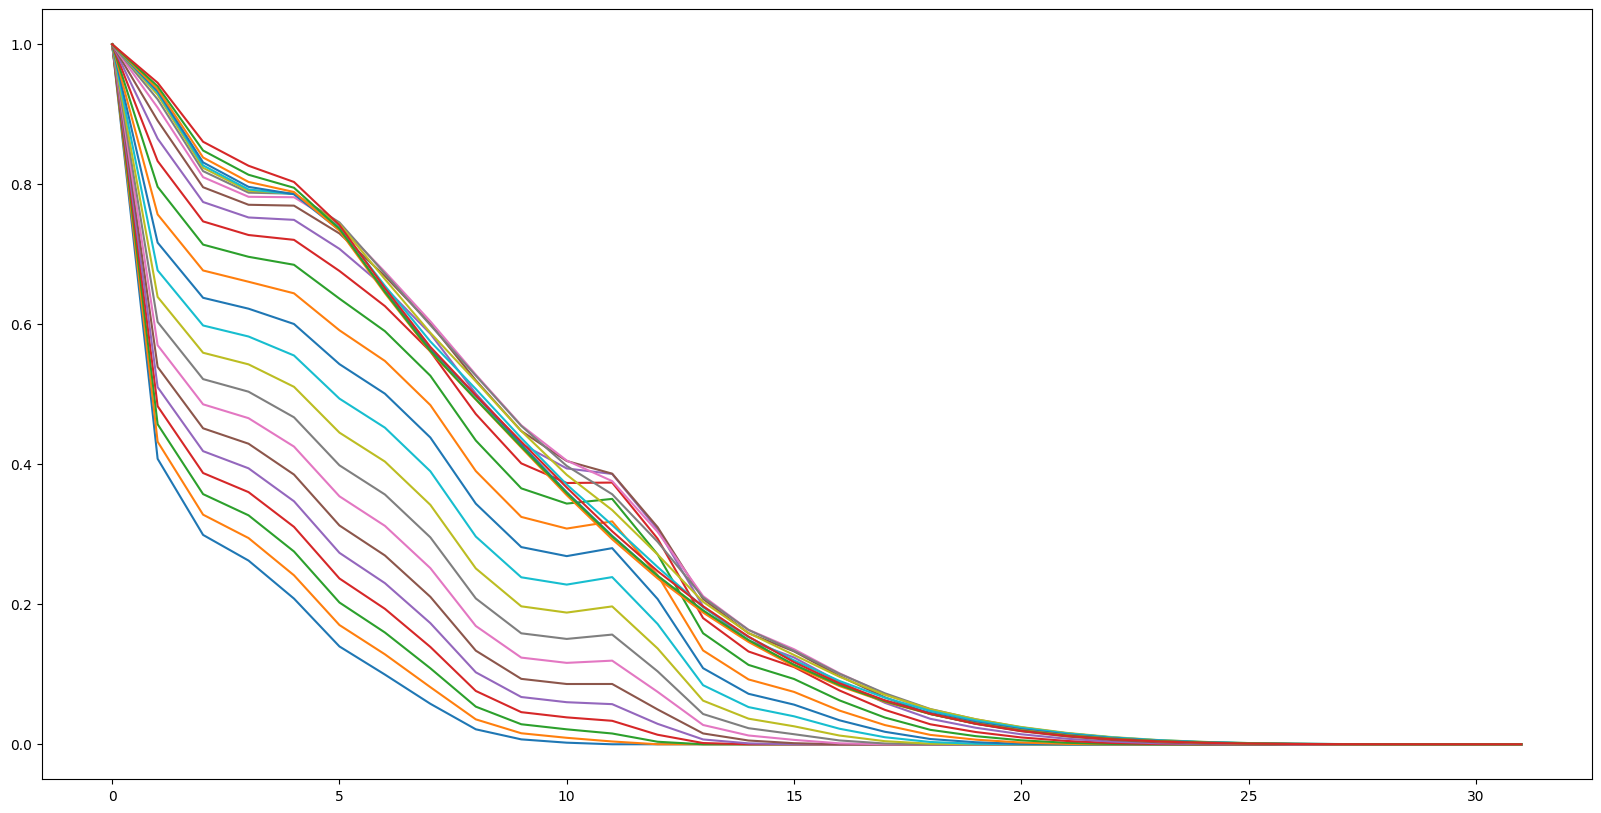

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(tempogram(y=X_0[0], hop_length=256, sr=100, win_length=32))
plt.show()

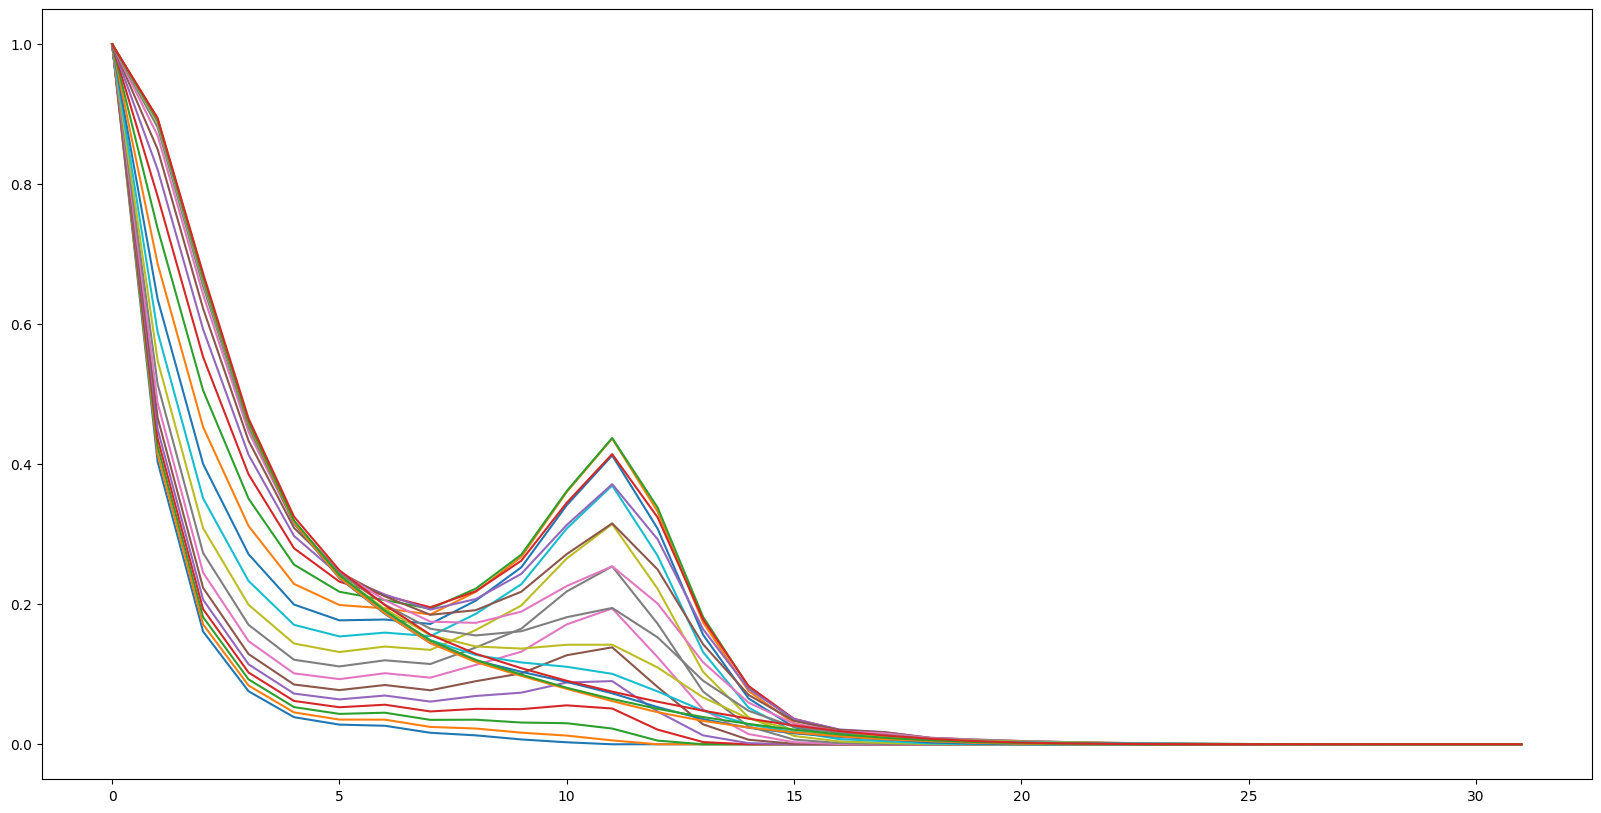

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(tempogram(y=X_1[0], hop_length=256, sr=100, win_length=32))
plt.show()

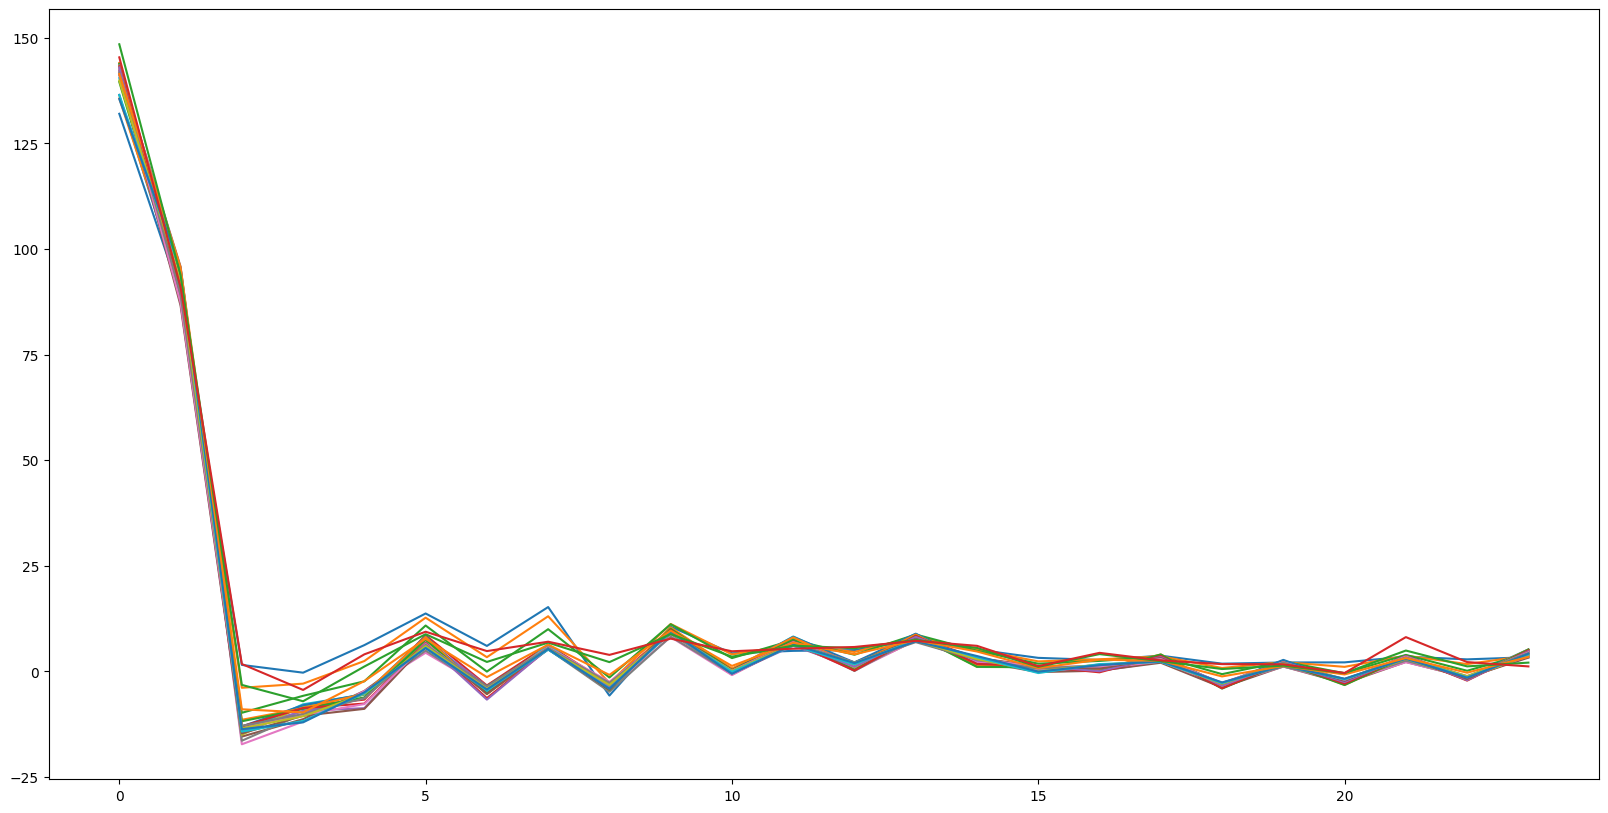

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(mfcc(y=X_0[0], hop_length=256, sr=100, n_mfcc=24))
plt.show()

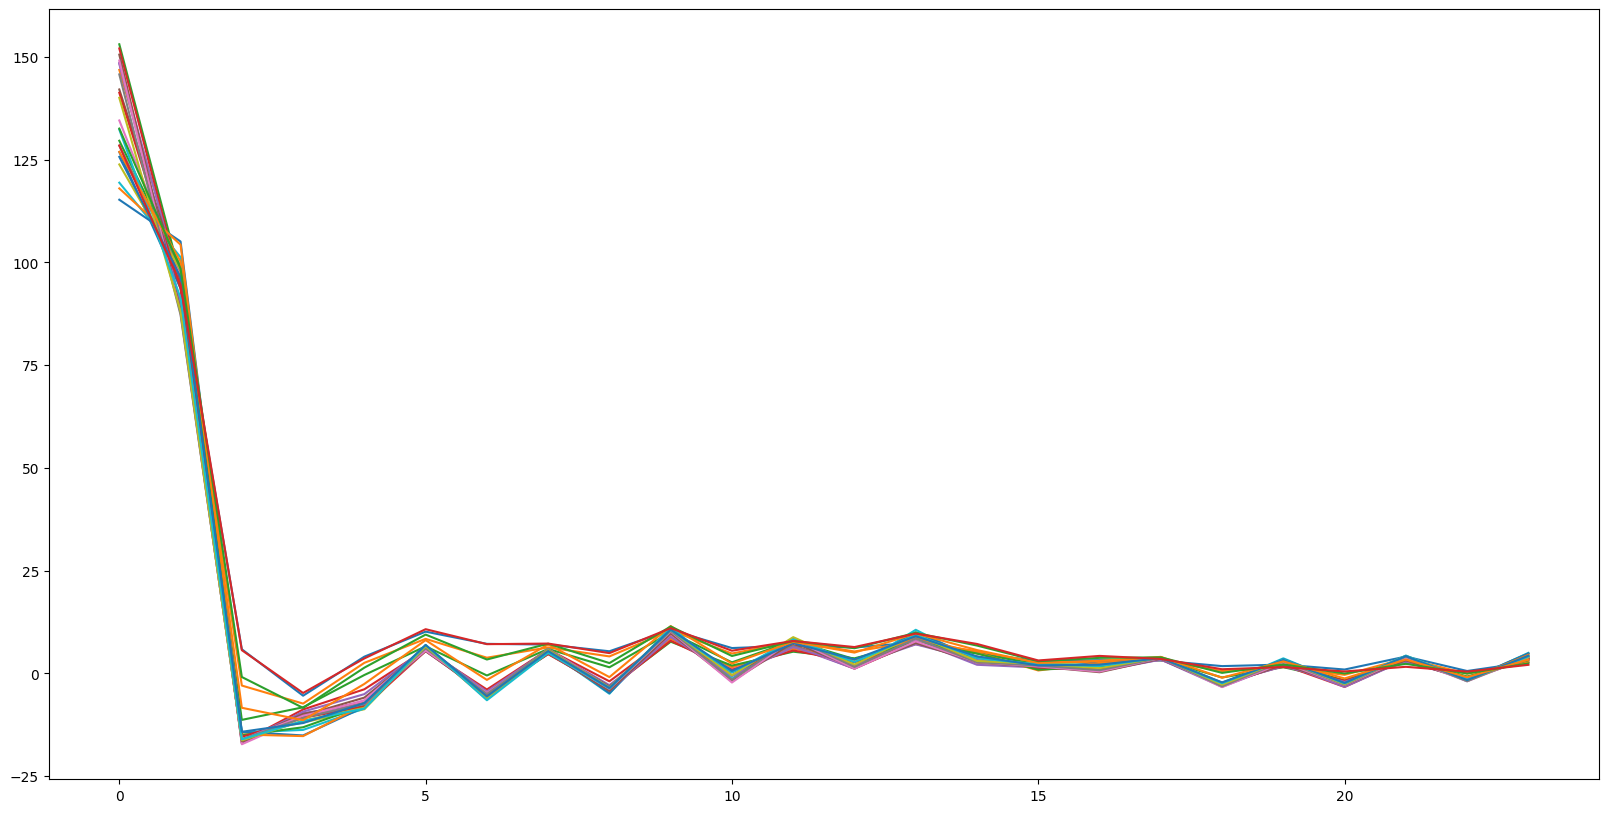

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(mfcc(y=X_1[0], hop_length=256, sr=100, n_mfcc=24))
plt.show()

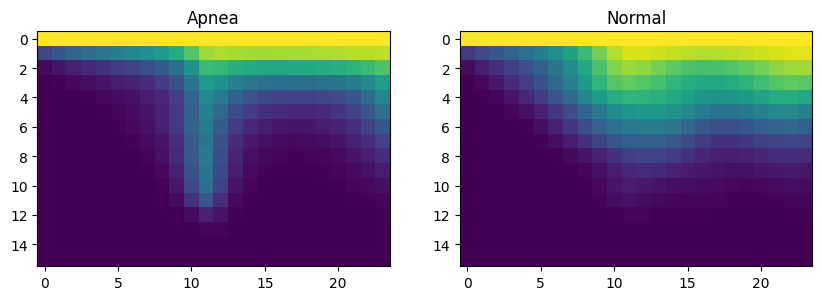

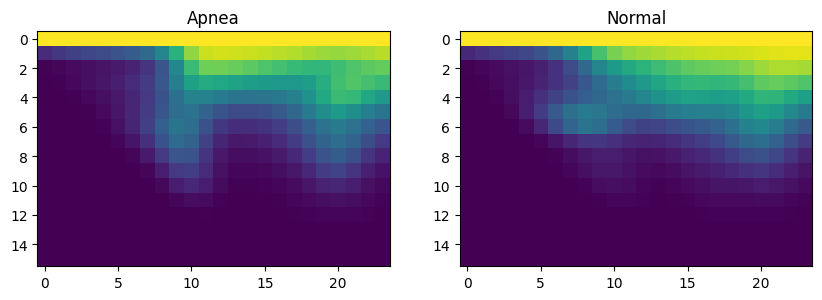

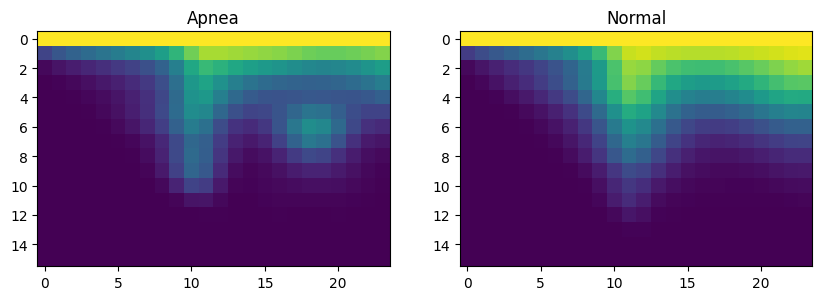

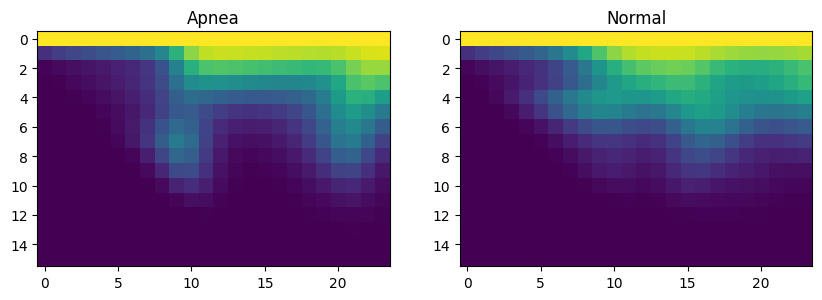

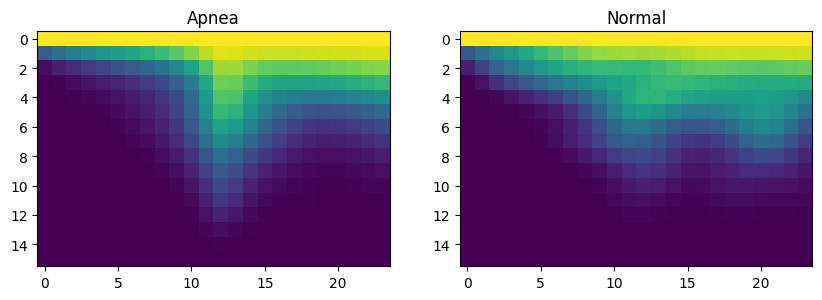

In [88]:
for i in range(5):
    a = tempogram(y=X_1[i], hop_length=256, sr=100, win_length=16)
    b = tempogram(y=X_0[i], hop_length=256, sr=100, win_length=16)
    plt.figure(figsize=(10, 30))
    plt.subplot(5, 2, i*2+1)
    plt.title("Apnea")
    plt.imshow(a)
    plt.subplot(5, 2, i*2+2)
    plt.title("Normal")
    plt.imshow(b)
plt.show()

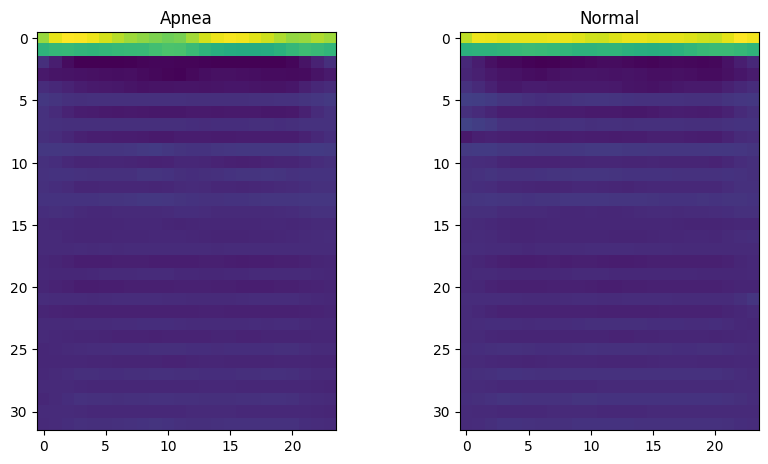

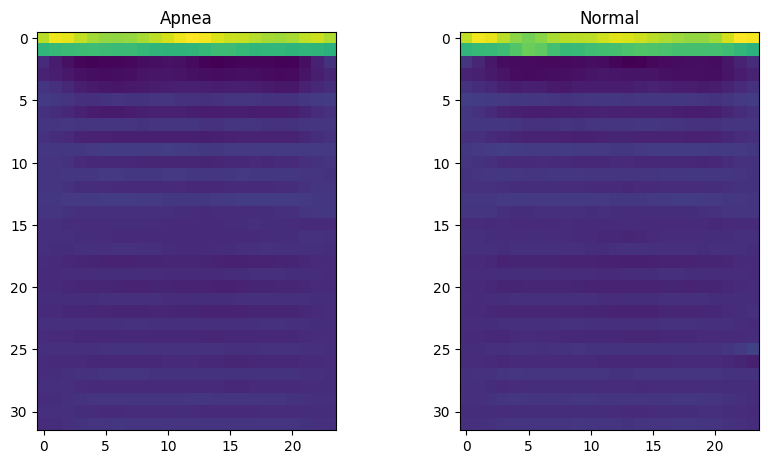

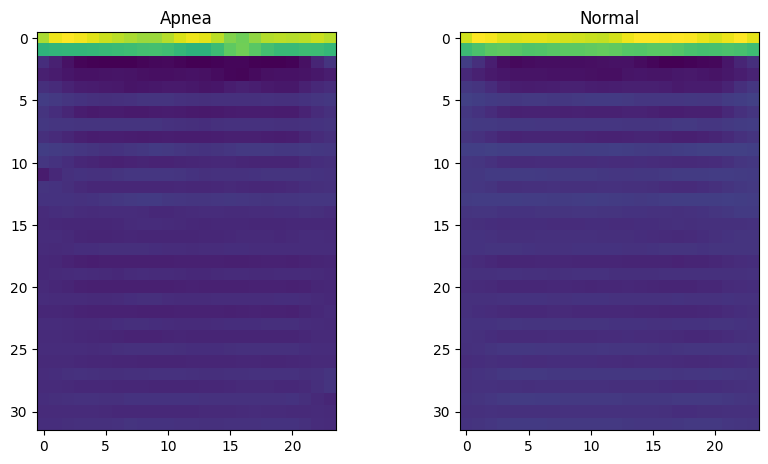

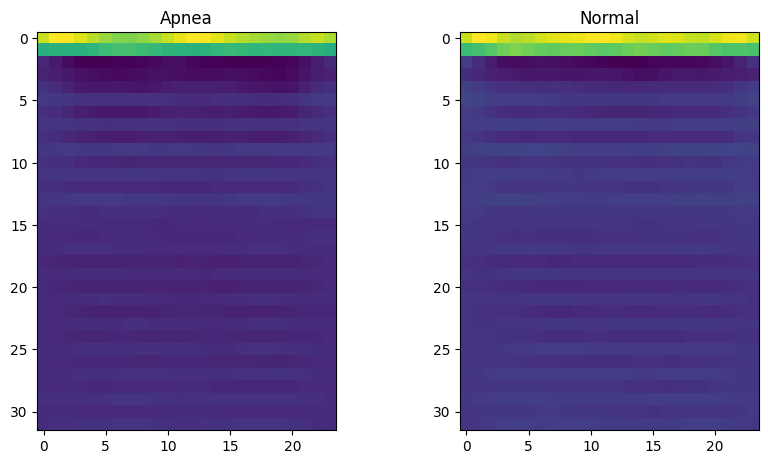

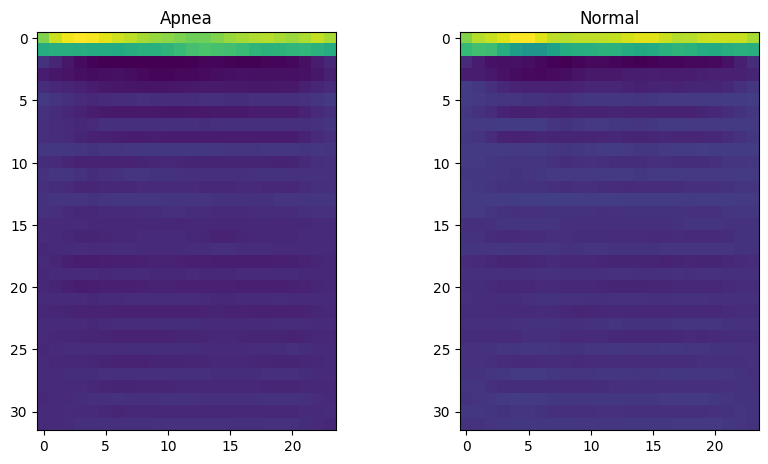

In [91]:
for i in range(5):
    a = mfcc(y=X_1[i], hop_length=256, sr=100, n_mfcc=32)
    b = mfcc(y=X_0[i], hop_length=256, sr=100, n_mfcc=32)
    # a = np.concatenate([a, delta(a), delta(a, order=2)])
    # b = np.concatenate([b, delta(b), delta(b, order=2)])
    plt.figure(figsize=(10, 30))
    plt.subplot(5, 2, i*2+1)
    plt.title("Apnea")
    plt.imshow(a)
    plt.subplot(5, 2, i*2+2)
    plt.title("Normal")
    plt.imshow(b)
plt.show()

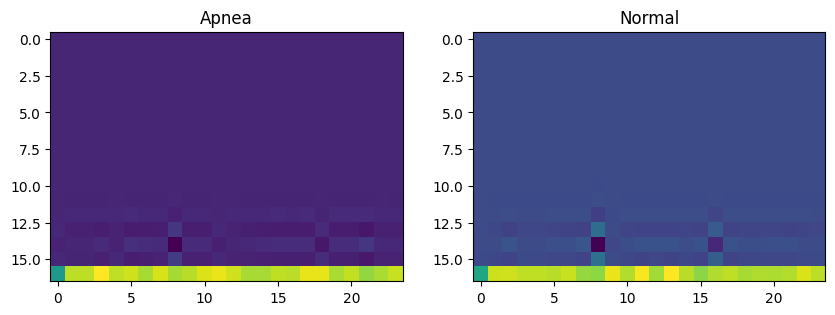

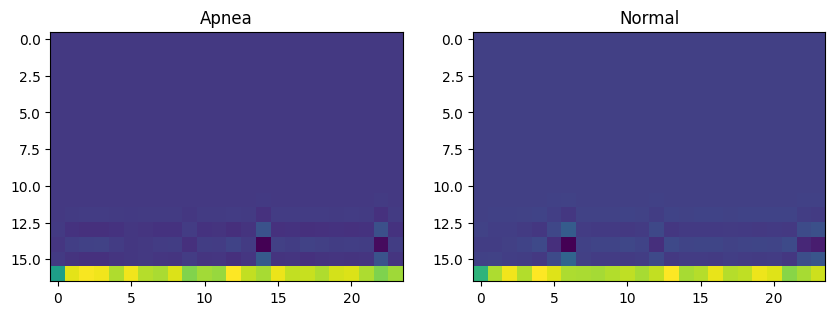

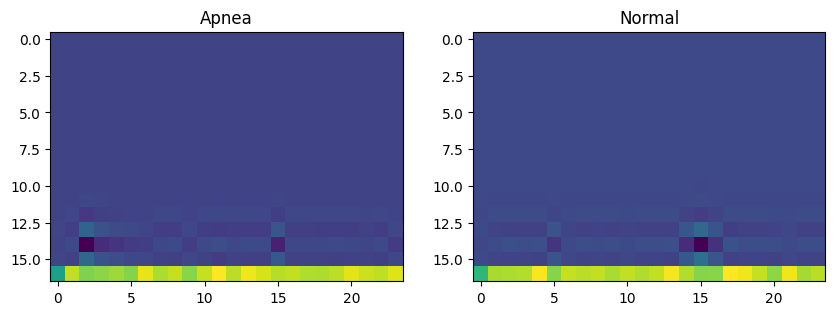

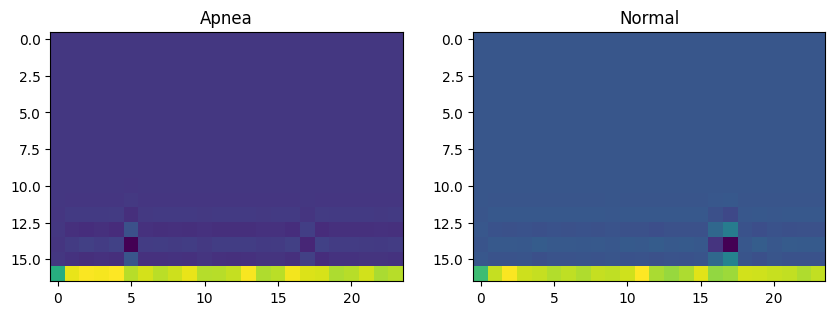

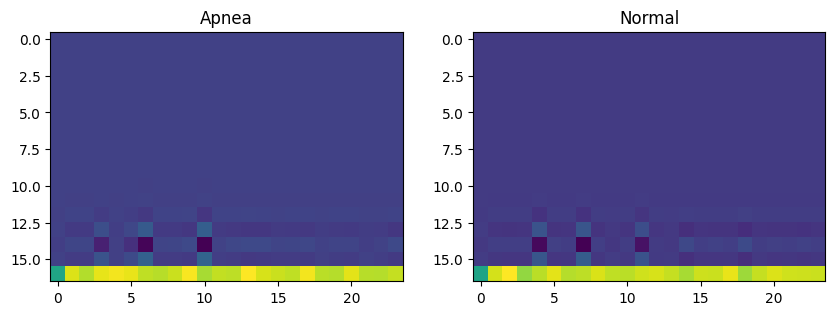

In [82]:
for i in range(5):
    a = poly_features(y=X_1[i], hop_length=256, sr=100, win_length=16, order=16)
    b = poly_features(y=X_0[i], hop_length=256, sr=100, win_length=16, order=16)
    plt.figure(figsize=(10, 30))
    plt.subplot(5, 2, i*2+1)
    plt.title("Apnea")
    plt.imshow(a)
    plt.subplot(5, 2, i*2+2)
    plt.title("Normal")
    plt.imshow(b)
plt.show()

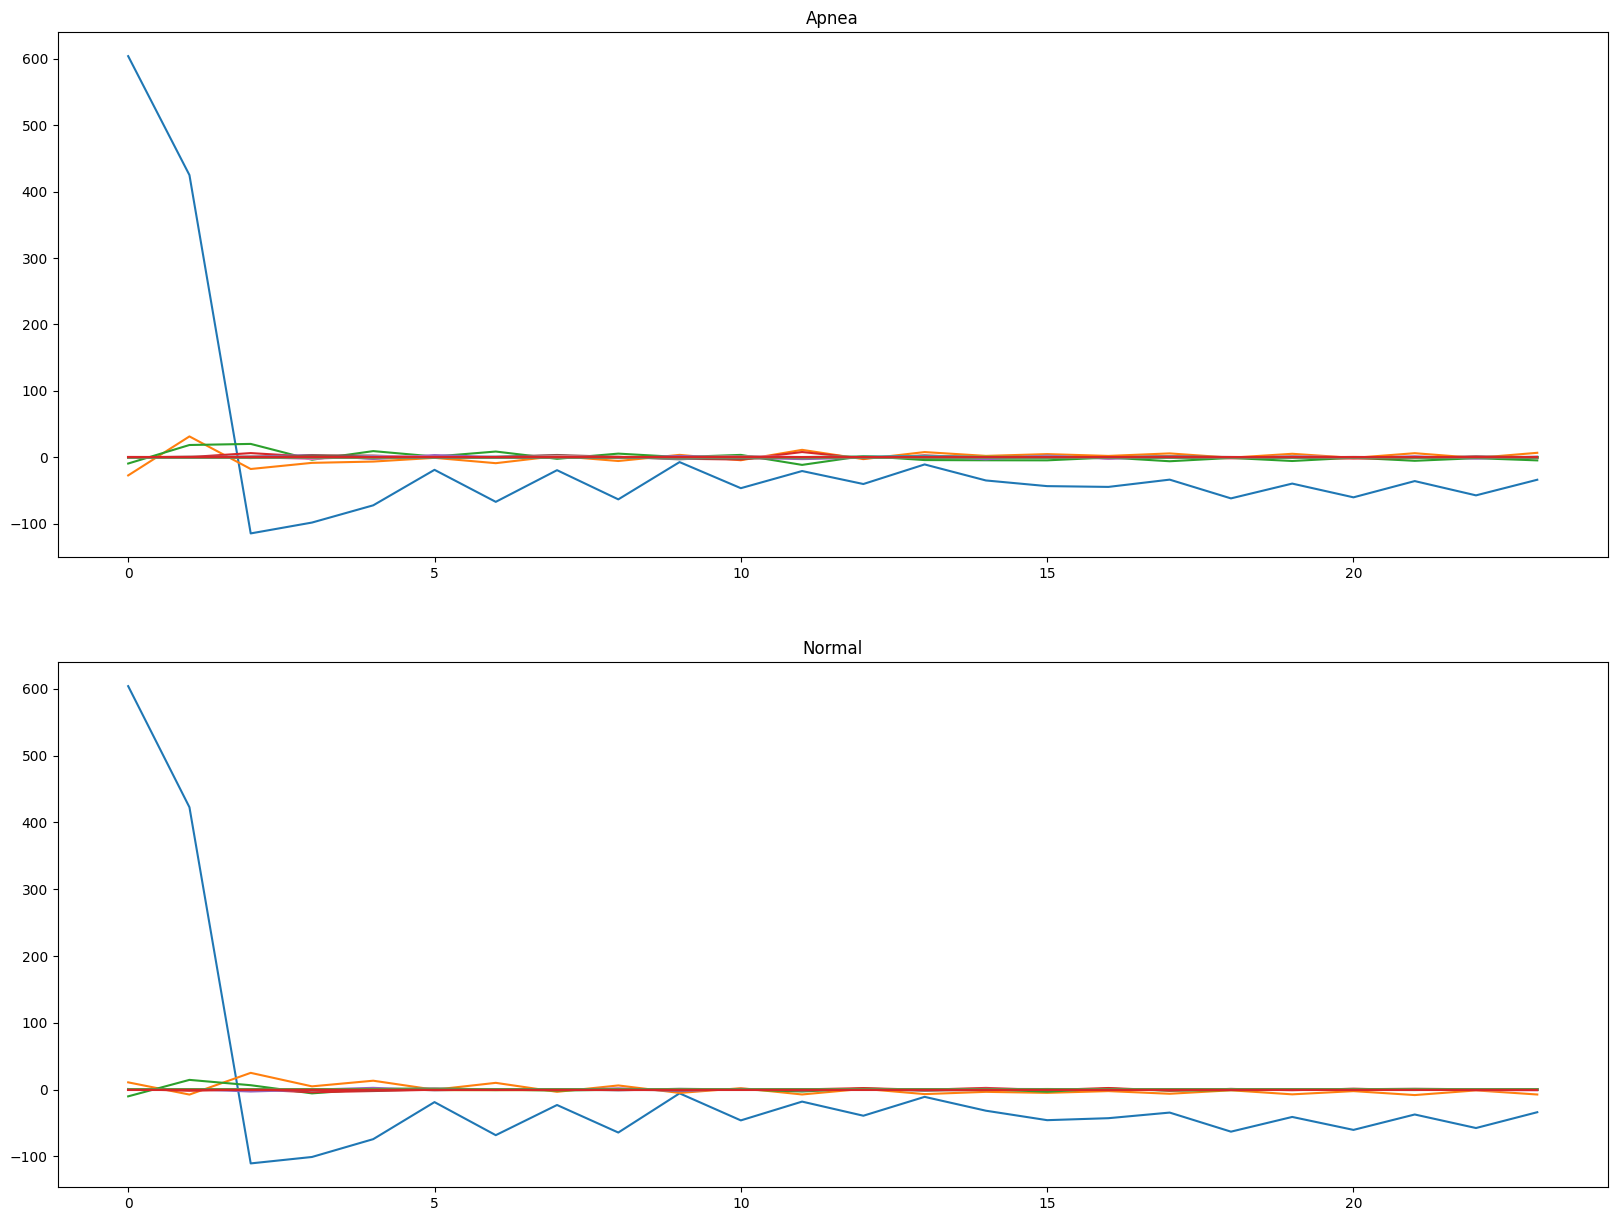

In [136]:
i = 2
a = mfcc(y=X_1[i], hop_length=256, sr=100, n_mfcc=24)
b = mfcc(y=X_0[i], hop_length=256, sr=100, n_mfcc=24)
a = np.concatenate([a, delta(a), delta(a, order=2)])
b = np.concatenate([b, delta(b), delta(b, order=2)])
plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.title("Apnea")
plt.plot(a)
plt.subplot(2, 1, 2)
plt.title("Normal")
plt.plot(b)
plt.show()

In [3]:
from scipy.signal import lfilter, savgol_filter

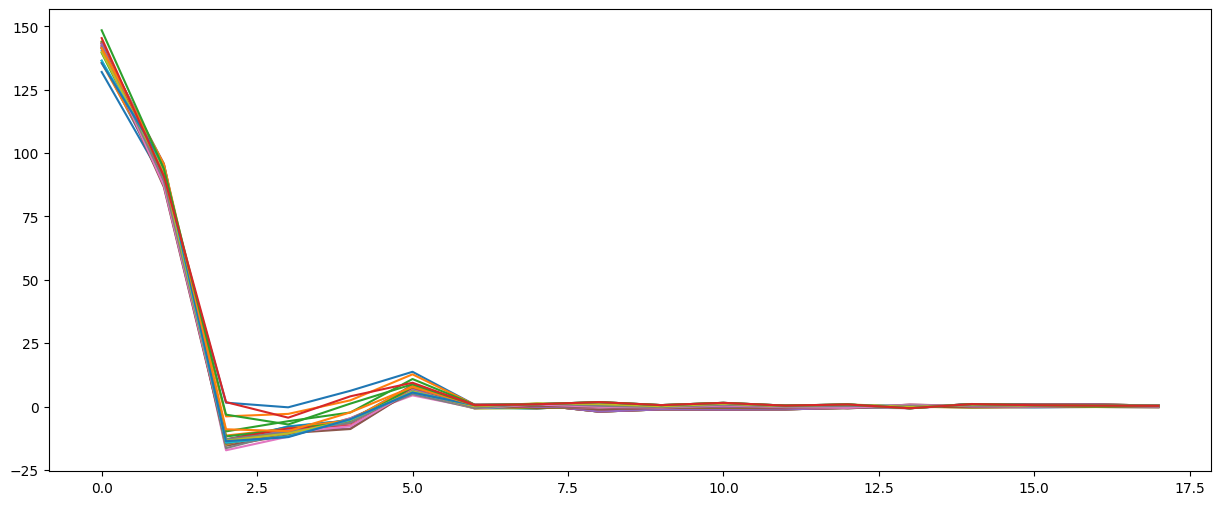

In [36]:
# s_a = savgol_filter(X_0[20], 100, 5)
s_a = X_0[0]
m_a = mfcc(y=s_a, sr=100, hop_length=256, n_mfcc=6)

dt = np.concatenate([m_a, delta(m_a), delta(m_a, order=2)])

plt.figure(figsize=(15, 6))
plt.plot(dt)
plt.show()

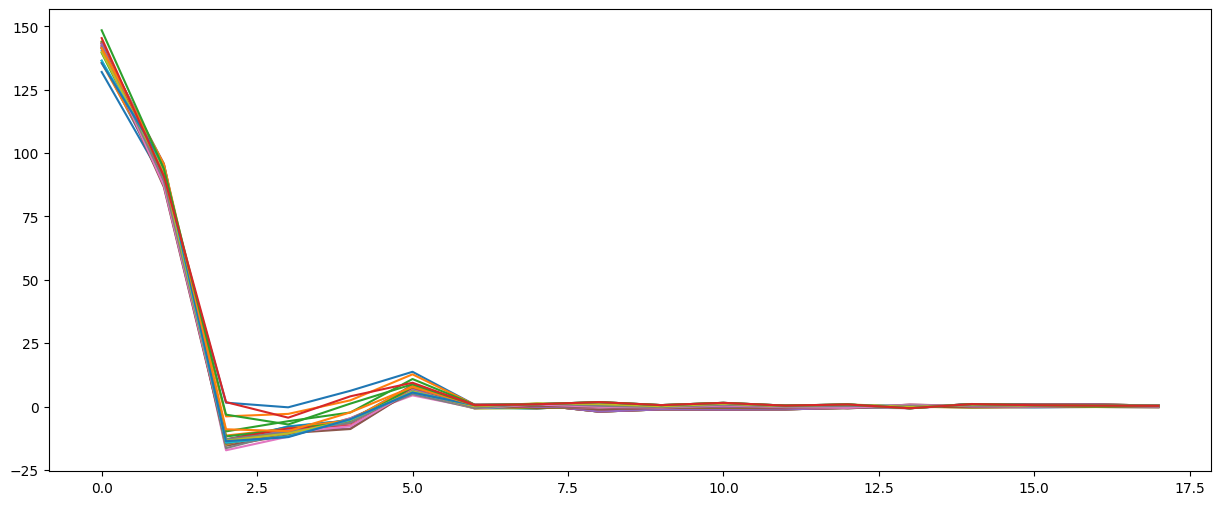

In [35]:
# s_a = savgol_filter(X_1[10], 100, 5)
s_a = X_0[0]
m_a = mfcc(y=s_a, sr=100, hop_length=256, n_mfcc=6)

dt = np.concatenate([m_a, delta(m_a), delta(m_a, order=2)])

plt.figure(figsize=(15, 6))
plt.plot(dt)
plt.show()